In [1]:
# Exercici 1 -Nivell 1
# Agafa el conjunt de dades que vulguis i realitza un pipeline i un gridsearch aplicant l'algorisme de Random Forest.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

df = pd.read_csv('archive/DelayedFlights.csv', header=0, sep=',',encoding='utf-8', dayfirst=True)

############################ Característiques de les dades carregades ###############################

print ("Head:\n" + str(df.head()))     # Els camps de cabçelera
print ("shape:\n" + str(df.shape))
print ("Columnes:\n" + str(df.columns))
print ("Correlacio:\n" + str(df.corr()))

############################################### Trantament de les dades ##############################################


# Treiem del conjunt de dades vols que han estat cancel·lats i derivats
df2 = df.loc[df.loc[:,'Cancelled'] == 0]
df2 = df2.loc[df2.loc[:,'Diverted'] == 0]
print ("shape:\n" + str(df2.shape))

# Eliminem del conjunt de dades, variables que no anem a utilitzar
df3 = df2.drop(['Dest','Origin','UniqueCarrier','Year','DepTime','CRSDepTime','ArrTime','CRSArrTime','FlightNum','TailNum','Cancelled','CancellationCode','Diverted', 'SecurityDelay', 'LateAircraftDelay','NASDelay'], axis = 1)
print ("shape:\n" + str(df3.shape))

# Terme quadràtic de la variable TaxiOut  i creem noves variables que ens poden ser d'interès
df3['TaxiOut2'] = df3['TaxiOut']**2 

# Creem dummy que ens indiqui el dia de la setmana
dummy = pd.get_dummies(df3['DayOfWeek'])
df4 = pd.concat([df3, dummy], axis = 1)
df_ok = df4.rename(columns={1:'Dll',2:'Dm',3:'Dx',4:'Dj',5:'Dv',6:'Ds',7:'Dg'})

############################ Característiques de les dades carregades del dataframe optimitzat ##########################

# La variable ArrDelay que serà la nostra variable resposta (y), la resta seran variables explicatives o independents(X). Creem els conjunts de dades corresponents.
X, y = df_ok.loc[:, df_ok.columns != 'ArrDelay'], df_ok.loc[:,'ArrDelay']

print ("Head:\n" + str(df_ok.head()))  # Els camps de cabçelera del nou dataframe
print ("Columnes:\n" + str(df_ok.columns))
print(X.shape, y.shape)

print ("Missing:\n")
print(df_ok.isna().sum())

# Missing values
df_ok.CarrierDelay.fillna(df_ok.CarrierDelay.mean(),inplace=True)
df_ok.WeatherDelay.fillna(df_ok.WeatherDelay.mode()[0],inplace=True)
#df_ok.NASDelay.fillna(df_ok.NASDelay.mode()[0],inplace=True)
#df_ok.SecurityDelay.fillna(df_ok.SecurityDelay.mode()[0],inplace=True)
#df_ok.LateAircraftDelay.fillna(df_ok.LateAircraftDelay.mode()[0],inplace=True)

print ("Sense Missing:\n")
print(df_ok.isna().sum())

df_ok = df_ok.reset_index()
df_ok.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(999, inplace=True)


Head:
   Unnamed: 0  Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  \
0           0  2008      1           3          4   2003.0        1955   
1           1  2008      1           3          4    754.0         735   
2           2  2008      1           3          4    628.0         620   
3           4  2008      1           3          4   1829.0        1755   
4           5  2008      1           3          4   1940.0        1915   

   ArrTime  CRSArrTime UniqueCarrier  ...  TaxiIn TaxiOut  Cancelled  \
0   2211.0        2225            WN  ...     4.0     8.0          0   
1   1002.0        1000            WN  ...     5.0    10.0          0   
2    804.0         750            WN  ...     3.0    17.0          0   
3   1959.0        1925            WN  ...     3.0    10.0          0   
4   2121.0        2110            WN  ...     4.0    10.0          0   

   CancellationCode  Diverted  CarrierDelay  WeatherDelay NASDelay  \
0                 N         0           NaN   

shape:
(1928371, 30)
shape:
(1928371, 14)
Head:
   Unnamed: 0  Month  DayofMonth  DayOfWeek  ActualElapsedTime  \
0           0      1           3          4              128.0   
1           1      1           3          4              128.0   
2           2      1           3          4               96.0   
3           4      1           3          4               90.0   
4           5      1           3          4              101.0   

   CRSElapsedTime  AirTime  ArrDelay  DepDelay  Distance  ...  CarrierDelay  \
0           150.0    116.0     -14.0       8.0       810  ...           NaN   
1           145.0    113.0       2.0      19.0       810  ...           NaN   
2            90.0     76.0      14.0       8.0       515  ...           NaN   
3            90.0     77.0      34.0      34.0       515  ...           2.0   
4           115.0     87.0      11.0      25.0       688  ...           NaN   

   WeatherDelay  TaxiOut2  Dll  Dm  Dx  Dj  Dv  Ds  Dg  
0           NaN      64

In [2]:
# Exercici 1 -Nivell 1
# Agafa el conjunt de dades que vulguis i realitza un pipeline i un gridsearch aplicant l'algorisme de Random Forest.

#################################### Dades Train y test entrenament ####################################

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# RandomForest
X_train1 = X_train[['DepDelay']]
model_RFR = RandomForestRegressor(max_depth=10)

# Carregeum model amb training data
model_RFR.fit(X_train1, y_train)

# Predir l'objectiu a les dades de tren i prova
predict_train = model_RFR.predict(X_train1)
predict_test = model_RFR.predict(X_test)

# Root Mean Squared Error i train i test data
print('RMSE train: ', mean_squared_error(y_train, predict_train)**(0.5))
print('RMSE test: ',  mean_squared_error(y_test, predict_test)**(0.5))

# Pipeline
# prediu variables d'objectiu a les dades de prova 
print(model_pipeline.predict(test_data))


# Grid Search
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])

# Crear i ajustar un model
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(df_ok.data, df_ok.target)
print(grid)
# Resultats del grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

(1542696, 21) (385675, 21) (1542696,) (385675,)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arevi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arevi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['little by step, step by step, pam, little by little, to counted steps... you go far.', 'And if you turn your eyes back to see the path drawn you will see how long the crossing has been.', 'And profitable.', 'Because little by little we will go far.', "We've come a long way.", "And today's thing is just a their how momentary break, because we go much further."]
['little', 'by', 'step', ',', 'step', 'by', 'step', ',', 'pam', ',', 'little', 'by', 'little', ',', 'to', 'counted', 'steps', '...', 'you', 'go', 'far', '.', 'And', 'if', 'you', 'turn', 'your', 'eyes', 'back', 'to', 'see', 'the', 'path', 'drawn', 'you', 'will', 'see', 'how', 'long', 'the', 'crossing', 'has', 'been', '.', 'And', 'profitable', '.', 'Because', 'little', 'by', 'little', 'we', 'will', 'go', 'far', '.', 'We', "'ve", 'come', 'a', 'long', 'way', '.', 'And', 'today', "'s", 'thing', 'is', 'just', 'a', 'their', 'how', 'momentary', 'break', ',', 'because', 'we', 'go', 'much', 'further', '.']
<FreqDist with 48 samples and 8

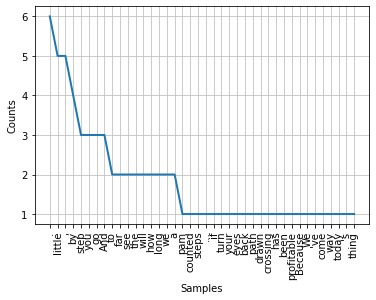

In [3]:
# Exercici 2 -Nivell 1
# Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

# a poc a poc, pas a pas, pam a pam, de mica en mica, a passes comptades… s’arriba lluny. I si gireu la vista enrere per veure el camí traçat veureu com de llarga ha estat la travesia. I profitosa.
# Perquè a poc a poc anirem lluny. Hem arribat lluny. I això d’avui només és una aturada momentània, perquè anem molt més enllà.
text="""little by step, step by step, pam, little by little, to counted steps... you go far. And if you turn your eyes back to see the path drawn you will see how long the crossing has been. And profitable.
Because little by little we will go far. We've come a long way. And today's thing is just a their how momentary break, because we go much further."""


# Tokenització de frases
tokenized_text=sent_tokenize(text)
print(tokenized_text)

# Tokenització de paraules
tokenized_word=word_tokenize(text)
print(tokenized_word)

# Distribució de freqüències
fdist = FreqDist(tokenized_word)
print(fdist)
fdist.most_common(2)

# Distribució de freqüències Grafic
fdist.plot(40,cumulative=False)
plt.show()


In [4]:
# Exercici 1 -Nivell 2
# Treu les stopwords i realitza stemming al teu conjunt de dades.
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenització de frases:\n",tokenized_word)
print("Filtrades de frases:\n",filtered_sent)

{'than', 'a', 'themselves', 'not', 'other', 'them', 'below', 'and', 'both', 'each', 'as', 'into', 'couldn', 'once', 'herself', 'such', 'here', 'being', 'doesn', 'from', "hasn't", 'above', 'won', 'will', "needn't", 've', 'who', 'its', 'again', 'she', 'over', 'needn', 'which', "hadn't", 'y', 'down', 'yourselves', 'with', 'any', 'their', 'because', 'was', 'does', 'what', 'so', 'up', 'itself', 'didn', 'while', 'under', 'd', 'ain', 'nor', 'off', 'this', 'those', "shan't", "weren't", 'most', 'where', 'i', 'the', 'myself', 'why', 'on', "aren't", 't', 'can', 'he', 'these', 'there', "should've", "couldn't", "mightn't", 'about', 'in', 'just', 'no', 'between', 'weren', 'more', 'be', 'yourself', 'o', 'only', 'that', 'at', 'having', 'are', "you'll", "isn't", 'shouldn', 'his', 'some', 'am', 'to', 'we', 'had', 'should', 'isn', 'ourselves', "won't", 'were', 'don', 'when', 'few', 'by', 'theirs', "don't", 'then', 'my', 'our', 'same', "wasn't", 'how', 'you', "she's", 'is', 'out', 'own', 'aren', 'before',

Head:
   Unnamed: 0  Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  \
0           0  2008      1           3          4   2003.0        1955   
1           1  2008      1           3          4    754.0         735   
2           2  2008      1           3          4    628.0         620   
3           4  2008      1           3          4   1829.0        1755   
4           5  2008      1           3          4   1940.0        1915   

   ArrTime  CRSArrTime UniqueCarrier  ...  TaxiIn TaxiOut  Cancelled  \
0   2211.0        2225            WN  ...     4.0     8.0          0   
1   1002.0        1000            WN  ...     5.0    10.0          0   
2    804.0         750            WN  ...     3.0    17.0          0   
3   1959.0        1925            WN  ...     3.0    10.0          0   
4   2121.0        2110            WN  ...     4.0    10.0          0   

   CancellationCode  Diverted  CarrierDelay  WeatherDelay NASDelay  \
0                 N         0           NaN   

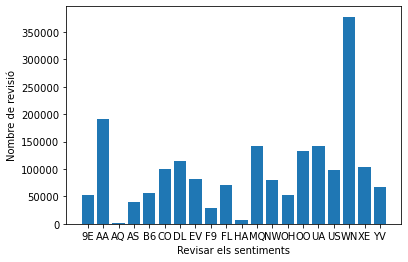

In [5]:
# Exercici 1 - Nivell 3
# Realitza sentiment analysis al teu conjunt de dades.
import pandas as pd
df = pd.read_csv('archive/DelayedFlights.csv', header=0, sep=',',encoding='utf-8', dayfirst=True)

print ("Head:\n" + str(df.head()))     # Els camps de cabçelera
print ("Info:\n" + str(df.info))
print ("Sentiment UniqueCarrier:\n" + str(df.UniqueCarrier.value_counts()))

Sentiment_count=df.groupby('UniqueCarrier').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Month'])
plt.xlabel('Revisar els sentiments')
plt.ylabel('Nombre de revisió')
plt.show()
